<a href="https://colab.research.google.com/github/Nandita-Baniya/The-Sparks-Foundation/blob/main/Exploratoryanalysis_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sparks Foundation

Data science and business analytics

**By - Nandita Baniya**

Task 3 :Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [3]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load data
data = pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Checking null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#get unique values
df = data.copy()
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))
columns = ['Ship Mode','Segment','Region','Category','Sub-Category']
for i in columns:
    display(df_dict[i])

,Ship Mode
0,Second Class
1,Standard Class
2,First Class
3,Same Day


,Segment
0,Consumer
1,Corporate
2,Home Office


,Region
0,South
1,West
2,Central
3,East


,Category
0,Furniture
1,Office Supplies
2,Technology


,Sub-Category
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage
5,Furnishings
6,Art
7,Phones
8,Binders
9,Appliances


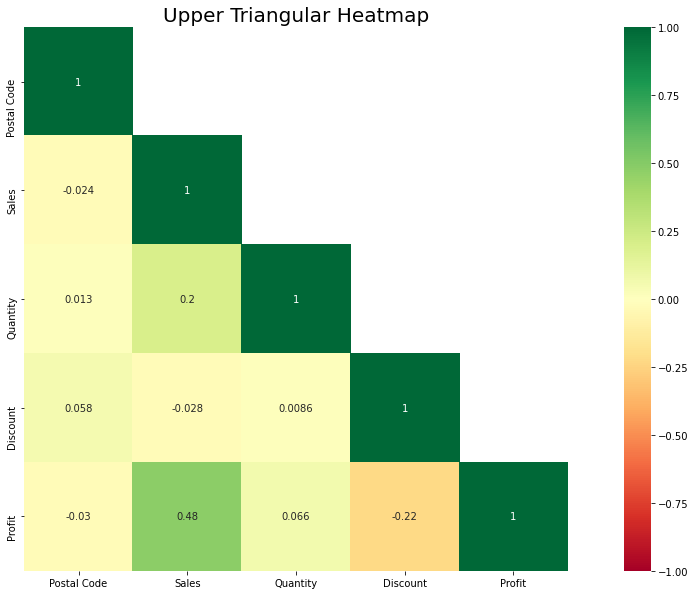

In [19]:
#Correlation heatmap matrix
mask=np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
ax.set_title('Upper Triangular Heatmap',fontsize=20)
fig.set_size_inches(20,10)
sns.heatmap(df.corr(),vmin=-1,vmax=1,square=True,annot=True,mask=mask,cmap='RdYlGn')


**Heatmap shows the correlation between profit and sales**

**Check profits made in each region** 

In [10]:
df2 = df.copy()
df2 = df2.pivot_table('Profit',columns='Region',aggfunc='sum')
df2

Region,Central,East,South,West
Profit,39706.3625,91522.78,46749.4303,108418.4489


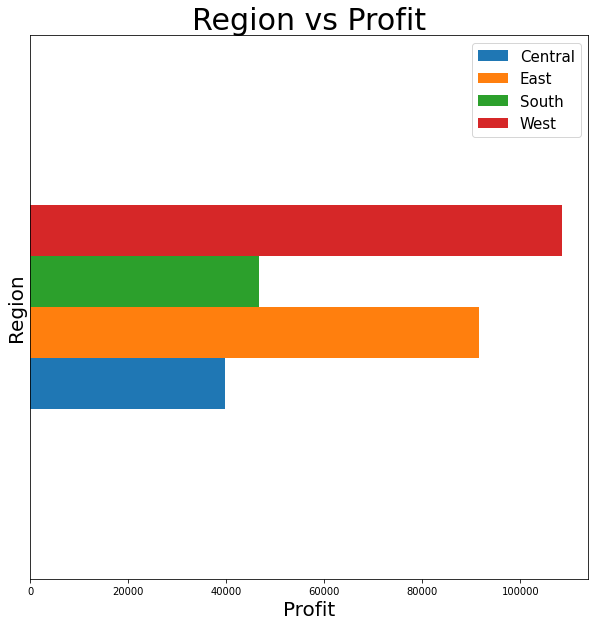

In [11]:
df2.reset_index(inplace=True,drop=True)
ax=df2.plot.barh(align='edge',width=0.3,figsize=(10,10))
ax.axes.yaxis.set_ticks([])
plt.xlabel('Profit',fontsize=20)
plt.ylabel('Region',fontsize=20)
plt.title('Region vs Profit',fontsize=30)
plt.legend(prop={'size': 15})
plt.show()

**Plotting indicates that the sales in region south and central is really low according to profit contribution made in each region including east and west 
so the discount rate would be a key incentive to increase the sales in that region malpng an increase in profit. Then we analyse the discount in each region.** 

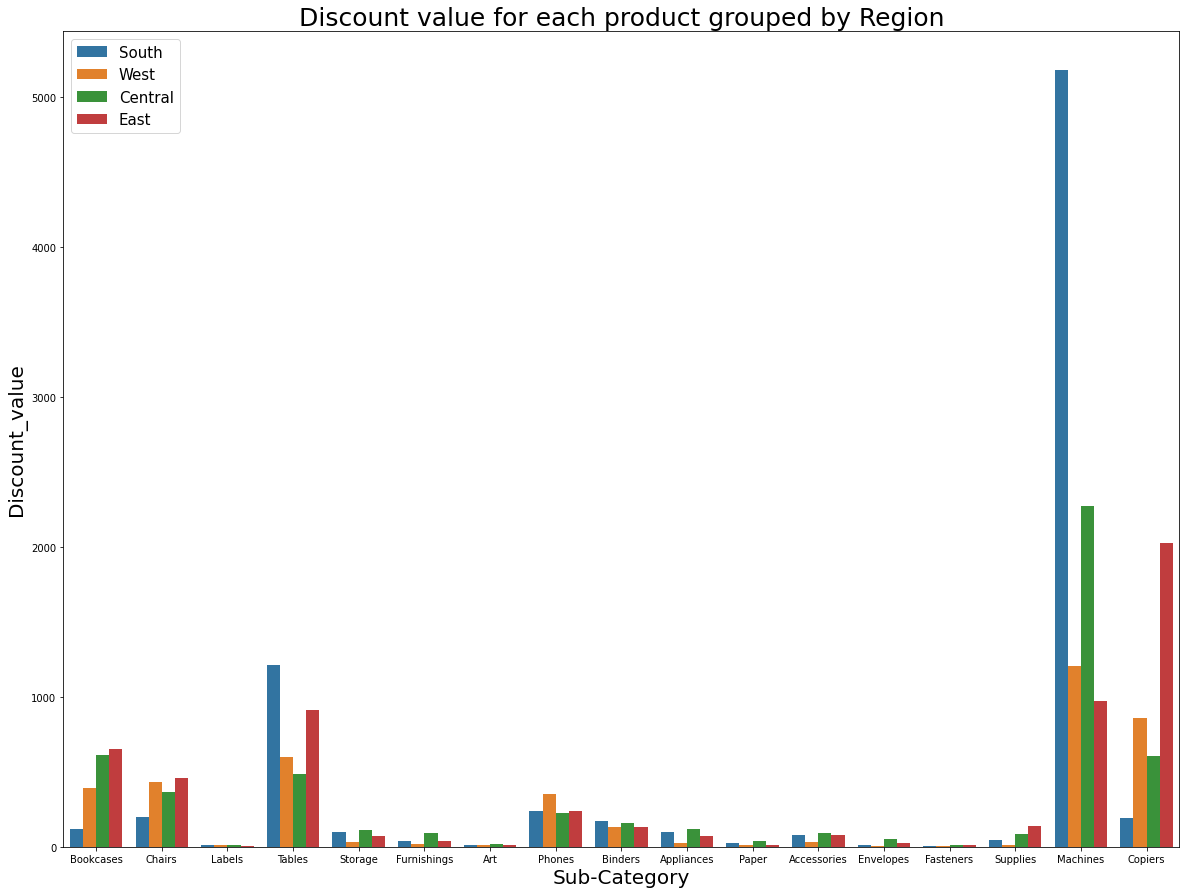

In [12]:
df4 = df.copy()
df4['Discount_value'] = (df4['Sales'] * df4['Quantity']) * df4['Discount'] 
plt.figure(figsize=(20,15))
ax=sns.barplot(x='Sub-Category',y='Discount_value',hue='Region',data=df4,ci=None)
ax.set_ylabel('Discount_value',fontsize=20)
ax.set_xlabel('Sub-Category',fontsize=20) 
plt.legend(prop={'size': 15})
plt.title('Discount value for each product grouped by Region',fontsize=25)
plt.show()

After observing the bar plot only 3 sub categories have higher discounts still the profit is not higher so we need to focus on better strategies like advertising for supermarket.

**Sales for each category**

In [13]:
df3 = df.copy()
df3['Sales'] = df['Sales'] * df['Quantity']
df3=df3.groupby(['Category'])['Sales'].sum()
df3 = pd.DataFrame(df3)
df3

,Sales
Category,
Furniture,3.859215e+06
Office Supplies,3.548585e+06
Technology,4.080262e+06


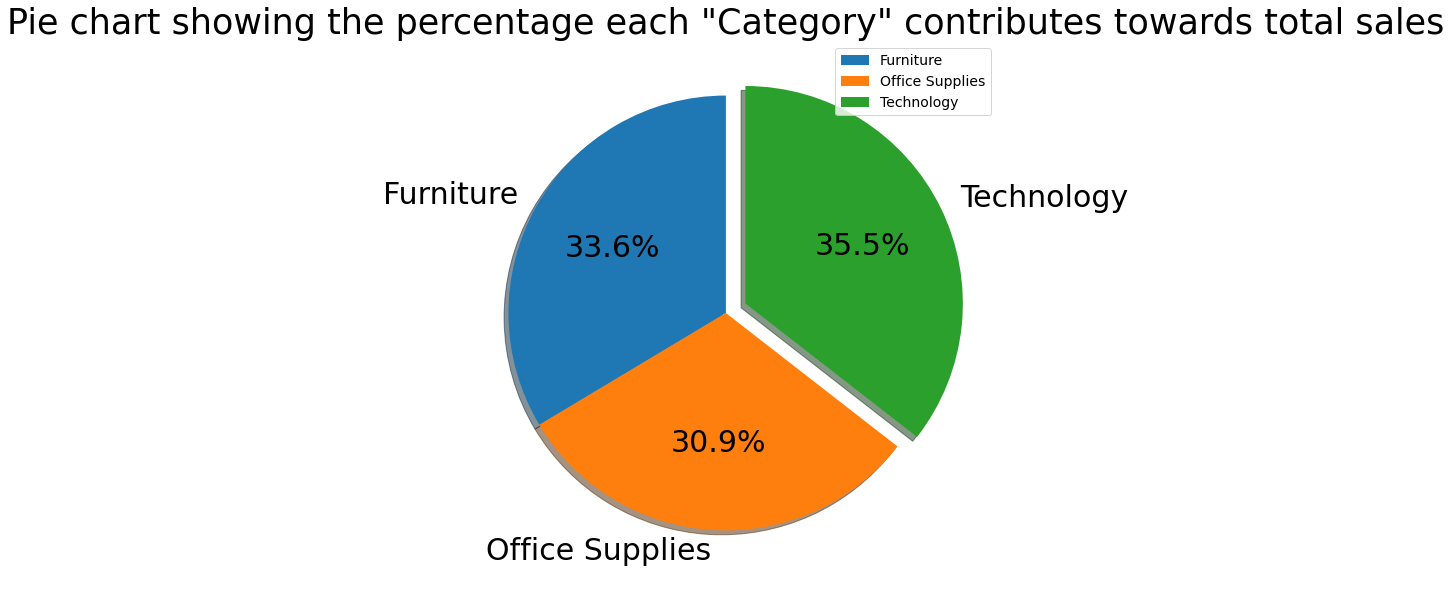

In [14]:
explode = (0, 0, 0.1)
ax=df3.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=30)
ax.set_title('Pie chart showing the percentage each "Category" contributes towards total sales',fontsize=35)
ax.set_ylabel('')
plt.legend(loc='upper right',prop={'size': 14})

In [15]:
df5 = df.copy()
df5=df5.groupby(['Ship Mode']).count().reset_index()
df5.drop(df5.columns.difference(['Ship Mode','Segment']), 1, inplace=True)
df5.loc[len(df.index)] = ['',0] 
df5.reset_index(drop=True)
df6=df5.sort_values(by=['Segment'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


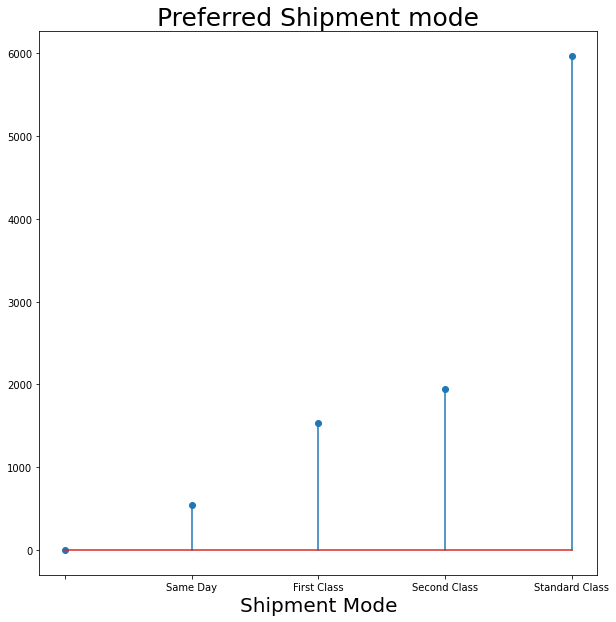

In [16]:
my_range=range(0,len(df6['Ship Mode']))
plt.figure(figsize=(10,10))
plt.stem(df6['Segment'])
plt.xticks(my_range,df6['Ship Mode'])
plt.xlabel('Shipment Mode',fontsize=20)
plt.title('Preferred Shipment mode',fontsize=25)
plt.show()

In [17]:
df7 = df.copy()
df7['Sales'] = df7['Sales'] * df['Quantity']
df7=df7.groupby(['Segment'])['Sales'].sum()
df7 = pd.DataFrame(df7)
df7

,Sales
Segment,
Consumer,5.819347e+06
Corporate,3.516108e+06
Home Office,2.152607e+06


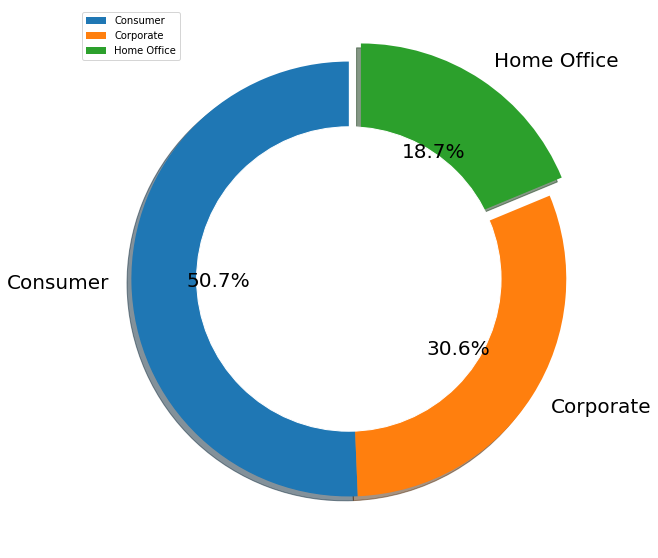

In [18]:
explode=(0,0,0.1)
ax=df7.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=20)
my_circle = plt.Circle((0,0),0.7,color='white')
cir = plt.gcf()
cir.gca().add_artist(my_circle)
ax.set_ylabel('')
plt.show()

Conclusion : Half of the sales belongs to consumer and home office has the least amount of sales

Profitable areas :
South and Central region
Sub-Category of products like Labels,Furnishings,Art,etc.
Home-Office segment

Business problem that can be derived :
Profits in areas like South and central are very low despite the discount given hence the sales in these areas are very low.This is a business problem that needs to dealt with by using appropriate marketing strategies like better advertising,etc. SuperStore should find better ways to market this type of shipment as it can increase its number of customers.  